<a href="https://colab.research.google.com/github/bimsi/Black-Friday-Sales-Prediction-Analysis/blob/main/Black_Friday_Sales_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy
!pip install pandas


In [4]:
import scipy.io as sio
import pandas as pd
import numpy as np

## Importing files from google drive

In [7]:
from google.colab import drive
train_data = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing csv file from google drive

In [9]:
import os
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading dataset

In [10]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Statistical Information

In [12]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Data type information

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Finding unique values

In [14]:
train_data.nunique()
# or train_data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

## Exploratory data analysis

### Distribution plot for purchase

<ipython-input-15-fb5b487a8520>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Purchase'], bins=25)


<Axes: xlabel='Purchase', ylabel='Density'>

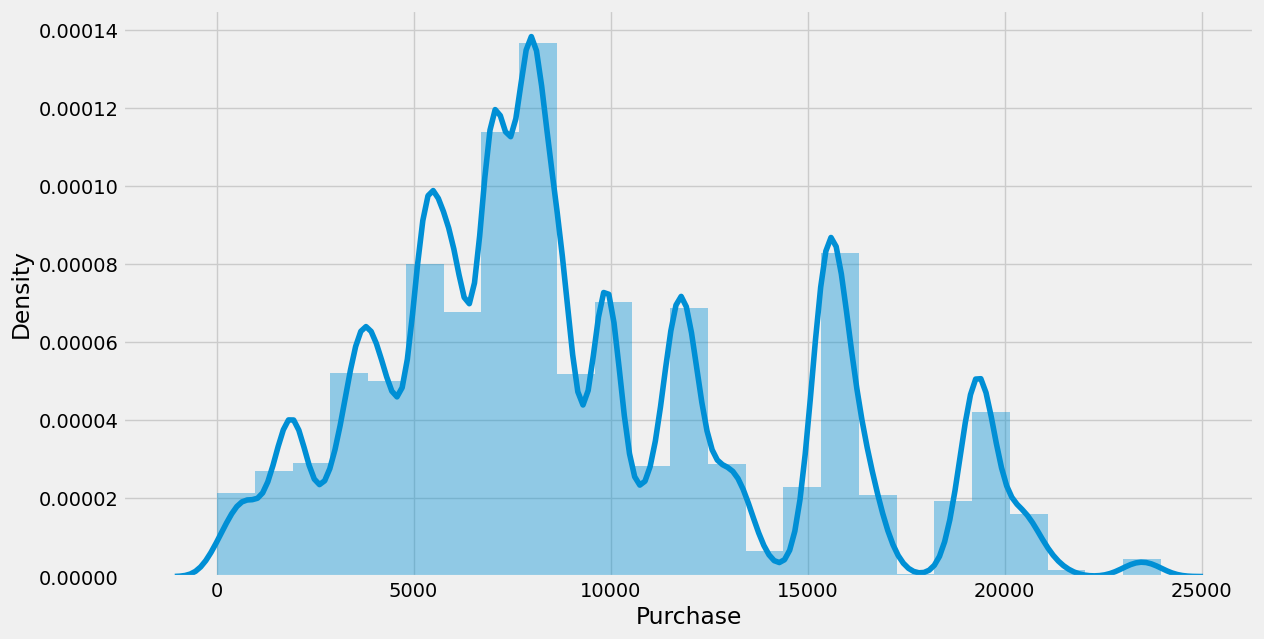

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(train_data['Purchase'], bins=25)

### Distribution of numeric variables

<Axes: xlabel='count', ylabel='Gender'>

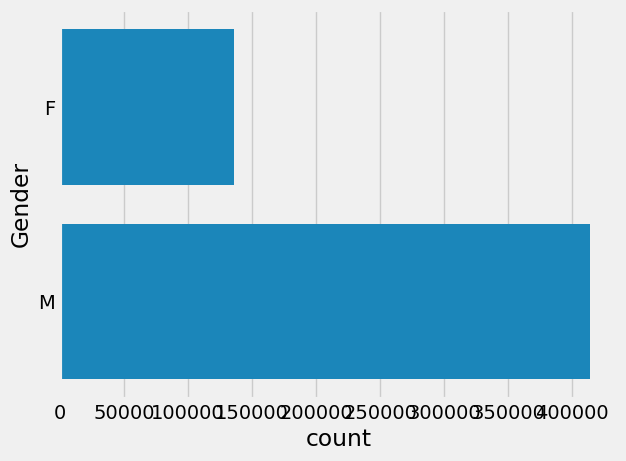

In [16]:
sns.countplot(train_data['Gender'])

<ipython-input-17-1917035dddfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=train_data, palette="Set2")


<Axes: xlabel='Gender', ylabel='count'>

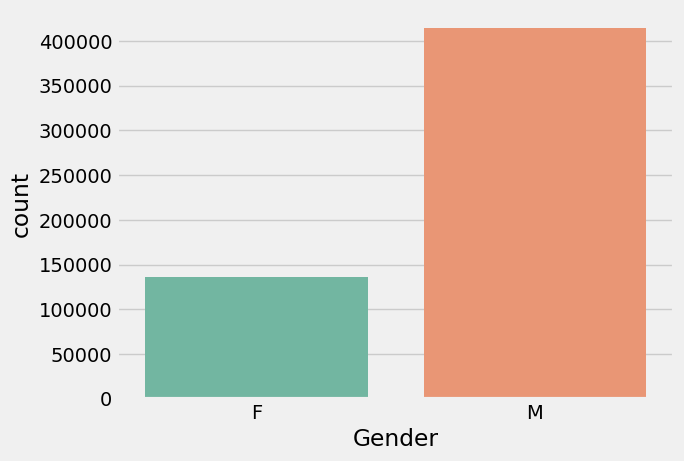

In [17]:
sns.countplot(x='Gender', data=train_data, palette="Set2")

<ipython-input-18-0a134b5a131c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=train_data, palette="Set3")


<Axes: xlabel='Age', ylabel='count'>

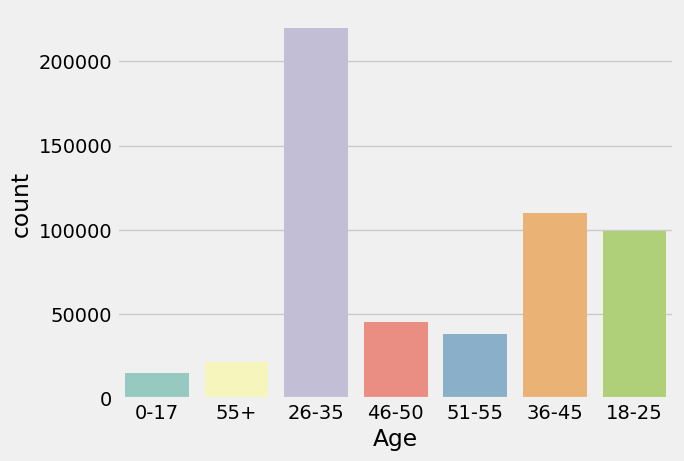

In [18]:
sns.countplot(x='Age', data=train_data, palette="Set3")

<ipython-input-19-298caecab295>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=train_data, palette="Set1")


<Axes: xlabel='Marital_Status', ylabel='count'>

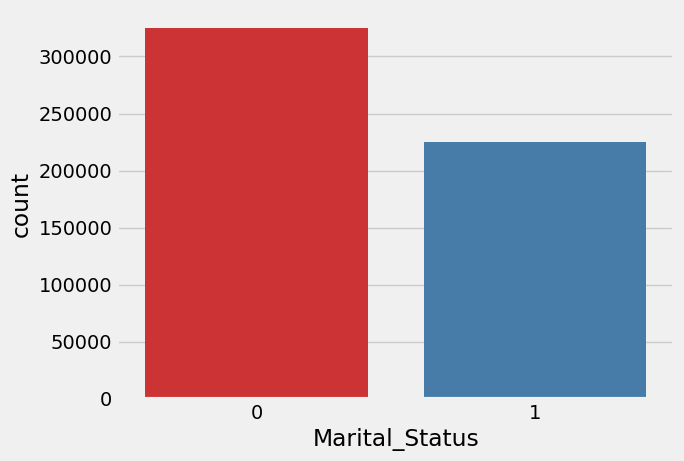

In [19]:
sns.countplot(x='Marital_Status', data=train_data, palette="Set1")

<ipython-input-20-b0b91946670a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=train_data, palette="Set2")


<Axes: xlabel='Occupation', ylabel='count'>

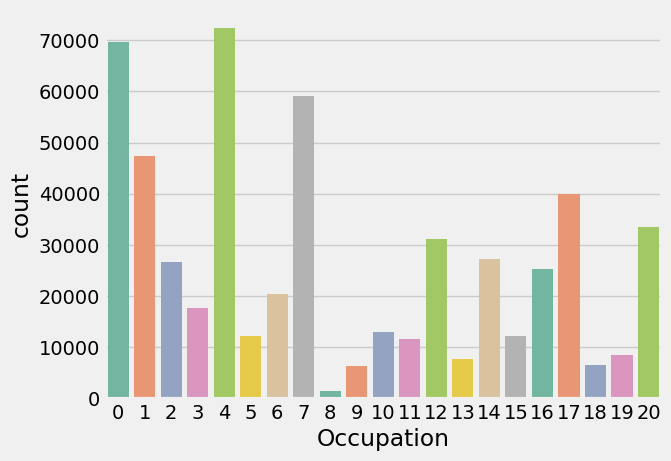

In [20]:
sns.countplot(x='Occupation', data=train_data, palette="Set2")

<ipython-input-21-a9cabca69a41>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_1', data=train_data, palette="Set2")


<Axes: xlabel='Product_Category_1', ylabel='count'>

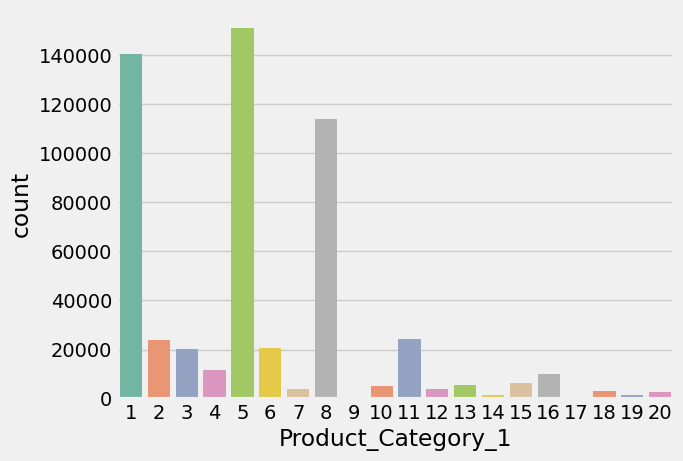

In [21]:
sns.countplot(x='Product_Category_1', data=train_data, palette="Set2")

<ipython-input-22-87db8b1658b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_2', data=train_data, palette="Set2")


<Axes: xlabel='Product_Category_2', ylabel='count'>

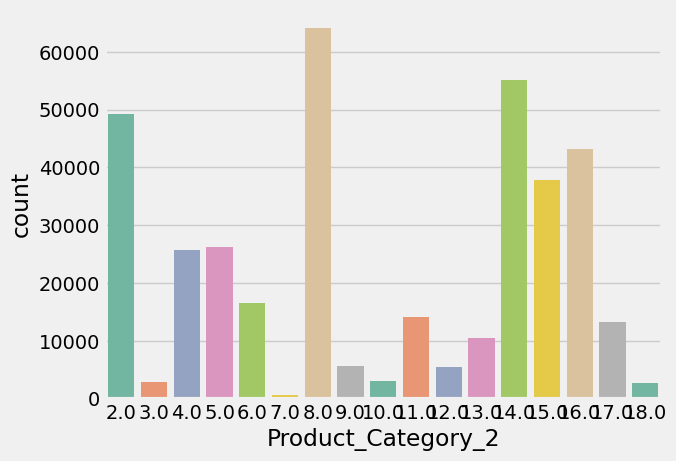

In [22]:
sns.countplot(x='Product_Category_2', data=train_data, palette="Set2")

<ipython-input-23-8bc0d52c4862>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category_3', data=train_data, palette="Set2")


<Axes: xlabel='Product_Category_3', ylabel='count'>

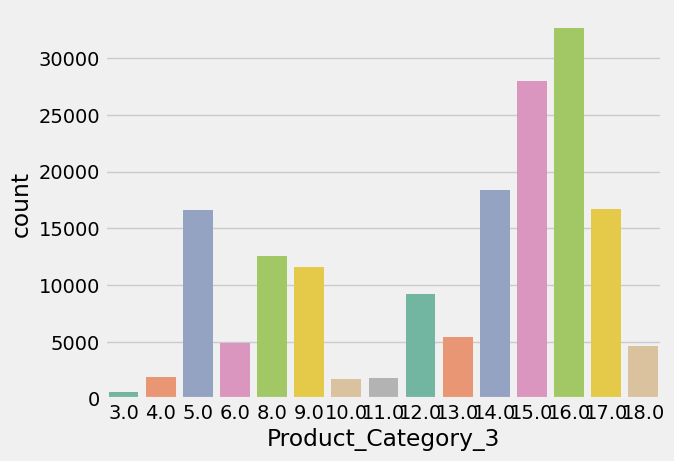

In [23]:
sns.countplot(x='Product_Category_3', data=train_data, palette="Set2")

<ipython-input-24-d93936876cc0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City_Category', data=train_data, palette="Set2")


<Axes: xlabel='City_Category', ylabel='count'>

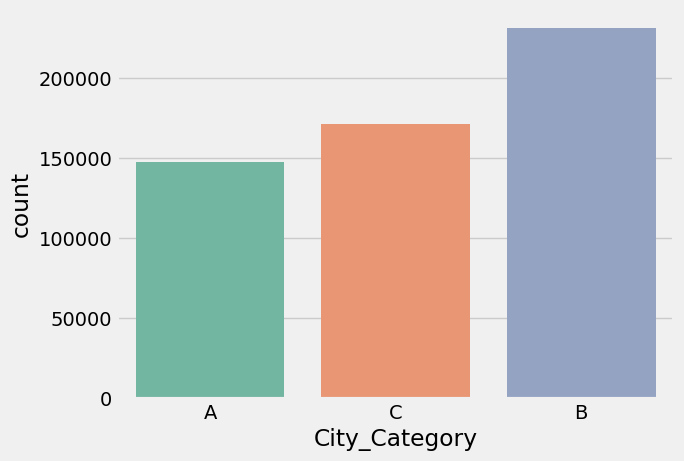

In [24]:
sns.countplot(x='City_Category', data=train_data, palette="Set2")

<ipython-input-25-951163c1e8c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stay_In_Current_City_Years', data=train_data, palette="Set2")


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

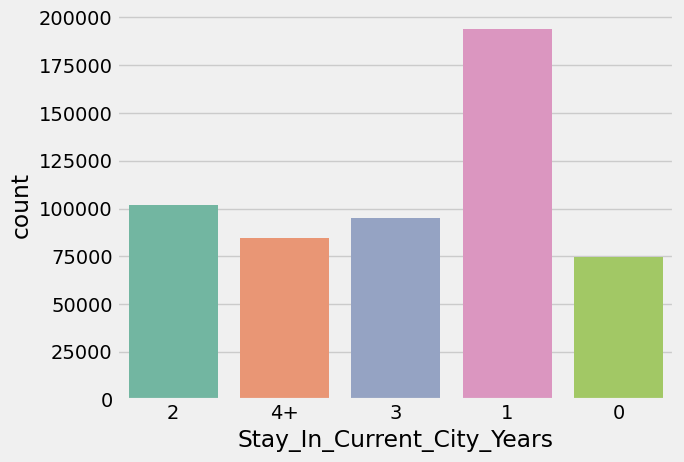

In [25]:
sns.countplot(x='Stay_In_Current_City_Years', data=train_data, palette="Set2")

## Bivariate Analysis

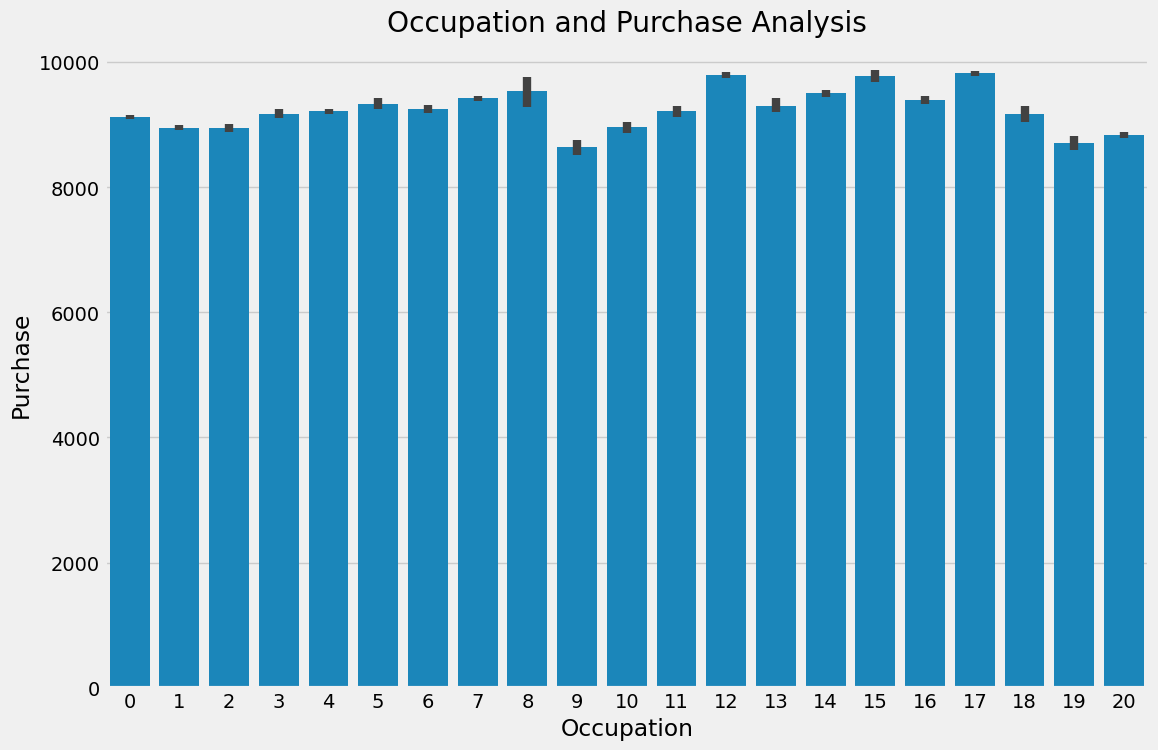

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Occupation", y="Purchase", data=train_data)
plt.title("Occupation and Purchase Analysis")
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.show()

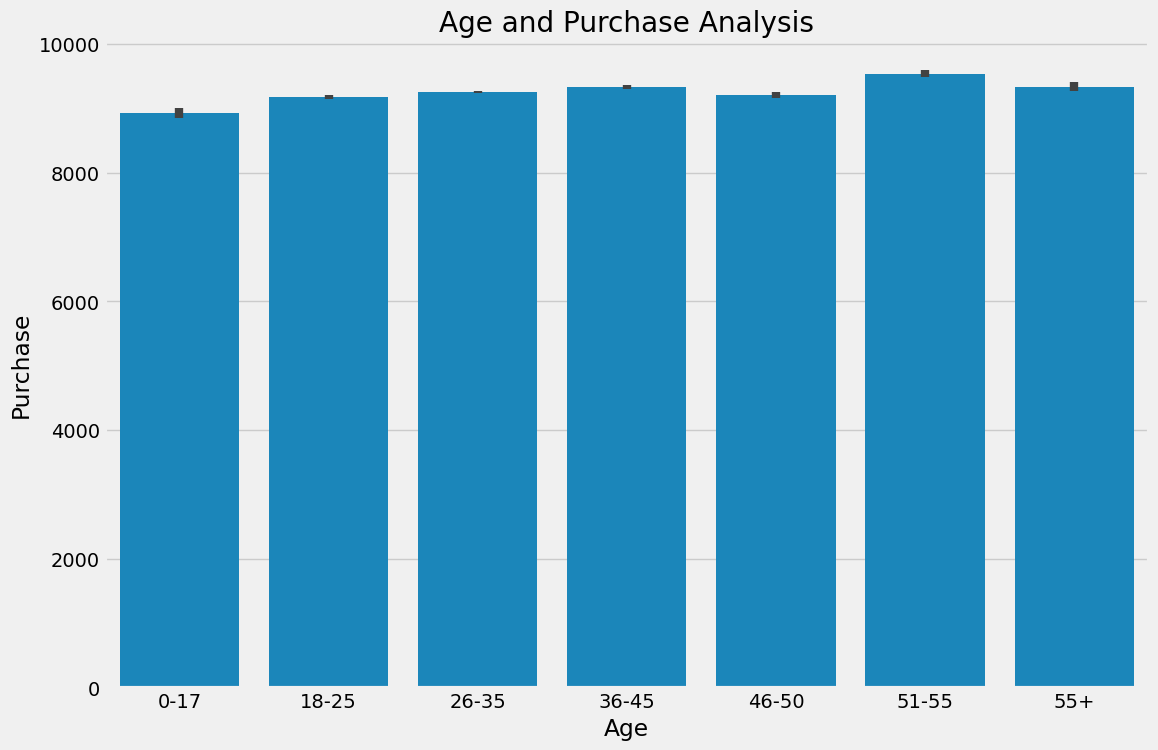

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Age", y="Purchase", data=train_data, order=train_data['Age'].sort_values())
plt.title("Age and Purchase Analysis")
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.show()

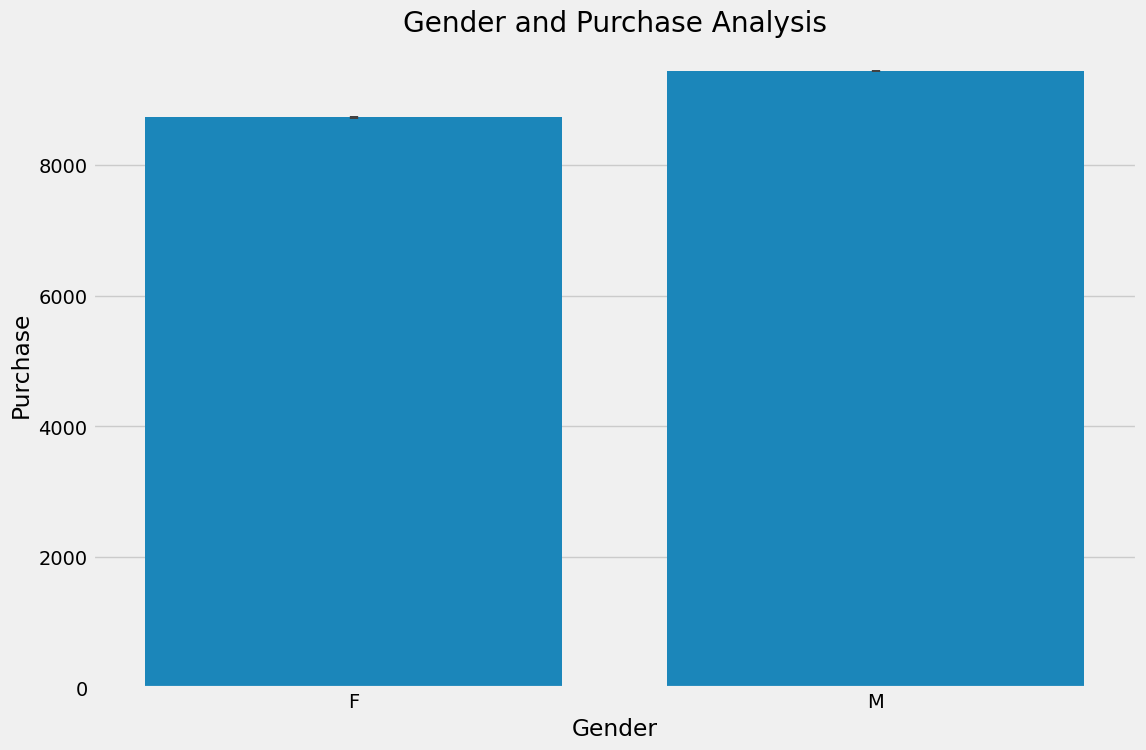

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Gender", y="Purchase", data=train_data)
plt.title("Gender and Purchase Analysis")
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.show()

## Pre-processing the dataset

### Check for the null values

In [29]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Handling missing values

In [30]:
train_data['Product_Category_2'].fillna(-2.0, inplace = True)
train_data['Product_Category_2'] = train_data['Product_Category_2'].astype(np.float32)

In [31]:
train_data['Product_Category_3'].fillna(-2.0, inplace = True)
train_data['Product_Category_3'] = train_data['Product_Category_3'].astype(np.float32)

In [32]:
train_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [33]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,-2.0,-2.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,-2.0,-2.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,-2.0,-2.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,-2.0,-2.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,-2.0,-2.0,365


### Saving as a csv file

In [34]:
train_data.to_csv('train_filled_missing_value.csv', index=False)

### Download csv file to google drive

In [35]:
# !cp train_filled_missing_value.csv '/content/drive/My Drive/Colab Notebooks/train_filled_missing_value.csv'

## Encoding values using dictionaries

In [36]:
gender_dict = {'F':0, 'M':1}
train_data['Gender_num_value'] = train_data['Gender'].apply(lambda x: gender_dict[x])
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_num_value
0,1000001,P00069042,F,0-17,10,A,2,0,3,-2.0,-2.0,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,-2.0,-2.0,1422,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,-2.0,1057,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,-2.0,-2.0,7969,1


### Converts age column into numerical representation

In [37]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_num_value
0,1000001,P00069042,F,0,10,0,2,0,3,-2.0,-2.0,8370,0
1,1000001,P00248942,F,0,10,0,2,0,1,6.0,14.0,15200,0
2,1000001,P00087842,F,0,10,0,2,0,12,-2.0,-2.0,1422,0
3,1000001,P00085442,F,0,10,0,2,0,12,14.0,-2.0,1057,0
4,1000002,P00285442,M,6,16,2,4,0,8,-2.0,-2.0,7969,1


## Corelation matrix

<ipython-input-38-03763ffab29b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


<Axes: >

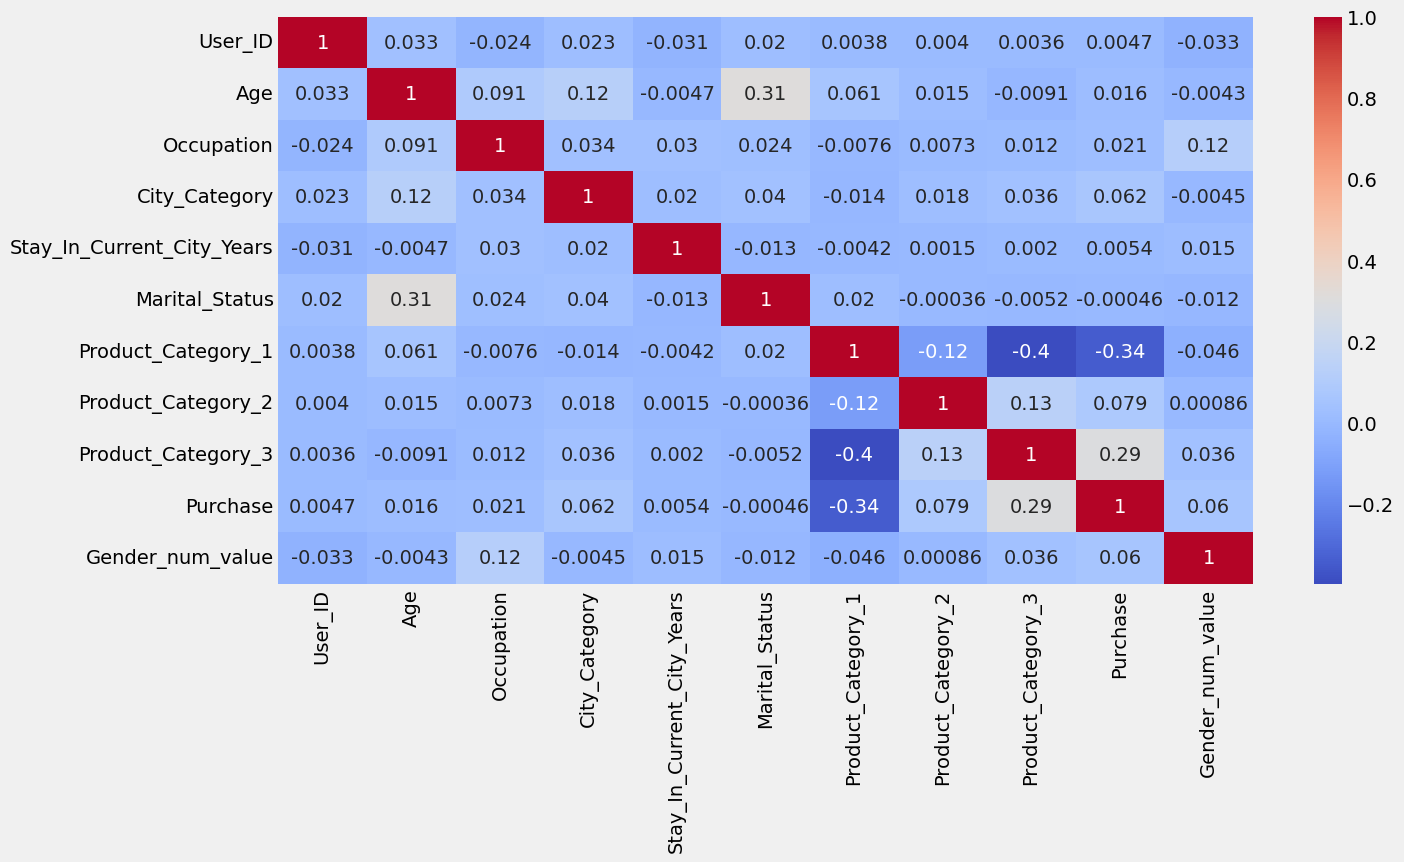

In [38]:
corr = train_data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [39]:
X = train_data.drop(columns=['User_ID', 'Product_ID', 'Purchase', 'Gender'])
y = train_data['Purchase']

## Model training

In [40]:
# import essential functions for model training
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# function Definition
def train(model, X, y):

    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25) # splitting data
    model.fit(x_train, y_train) # model traning

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred))) # MSE on the test set
    print("CV Score:", np.sqrt(cv_score))  # Average CV score

In [41]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)

Results
MSE: 4617.99403420172
CV Score: 4625.252945835687


<Axes: title={'center': 'Model Coefficients'}>

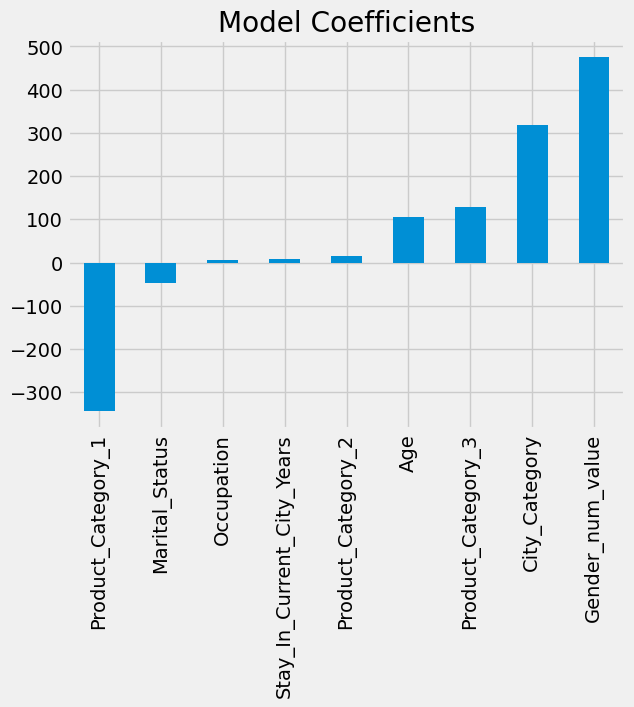

In [42]:
# creating series of coefficients
coef = pd.Series(model.coef_, X.columns).sort_values()

# plotting coefficient
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3369.806846651373
CV Score: 3339.3688635316303


<Axes: title={'center': 'Feature Importance'}>

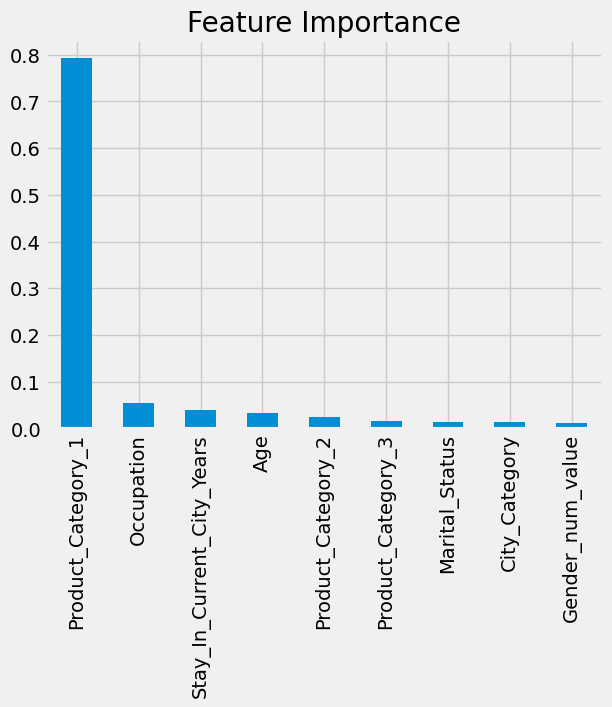

In [43]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor() # initializing model
train(model, X, y) # training model
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False) # accessing feature_importances;  how much each feature contributes to the model's predictions
features.plot(kind='bar', title='Feature Importance') # visualizing feature importances

Results
MSE: 3062.8414051164723
CV Score: 3052.374244692329


<Axes: title={'center': 'Feature Importance'}>

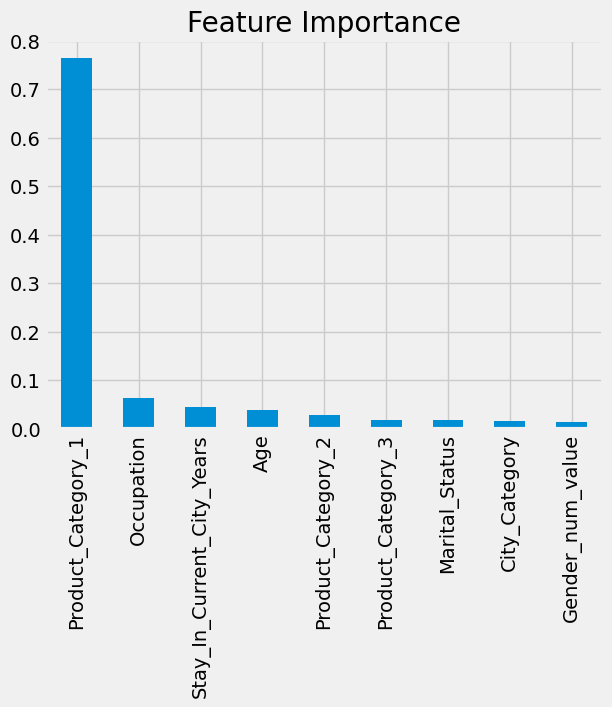

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)

In [ ]:
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
pred = model.predict(x_test)

In [ ]:
submission = pd.DataFrame()
submission['User_ID'] = x_test['User_ID']
submission['Purchase'] = pred

In [ ]:
submission.to_csv('submission.csv', index=False)